In [1]:
import pandas as pd
import numpy as np
from wine_acquire import wrangle_wine, split_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from modeling import dt_comp, rf_comp, knn_comp, lr_comp, model_comp
from sklearn.tree import DecisionTreeClassifier

In [2]:
wine = wrangle_wine()

In [3]:
wine

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  wine_color  
0         8.8        6           0  
1         9.5        6           0  
2        10.1        6           0  
3         9.9        6           0  
4         9.9        6           0  
...       ...      ...         ...  
1594     10.5        5           1  
1595     11.2        6           1  
1596     11.0        6           1  
1597     10.2        5           1  
1598     11.0        6           1  

[6495 rows x 13 columns]

In [4]:
quality_bin = []
for row in wine.quality:
    if row <= 5:
        quality_bin.append('low')
    elif row == 6:
        quality_bin.append('mid')
    else:
        quality_bin.append('high')
wine['quality_bin'] = quality_bin

In [5]:
train, validate, test = split_data(wine)

In [6]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
2671            5.9              0.30         0.30             2.0      0.030   
4444            5.0              0.35         0.25             7.8      0.031   
3604            7.4              0.36         0.23             1.9      0.017   
2623            6.5              0.18         0.41            14.2      0.039   
1549            8.5              0.15         0.49             1.5      0.031   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
2671                 38.0                 142.0  0.98892  3.41       0.41   
4444                 24.0                 116.0  0.99241  3.39       0.40   
3604                 31.0                  69.0  0.98920  2.93       0.36   
2623                 47.0                 129.0  0.99678  3.28       0.72   
1549                 17.0                 122.0  0.99320  3.03       0.40   

      alcohol  quality  wine_color quality_bin  
2671     12.9        7           0        high  
4444     11.3        6           0         mid  
3604     12.5        6           0         mid  
2623     10.3        7           0        high  
1549     10.3        6           0         mid

In [7]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_color', 'quality_bin'],
      dtype='object')

In [8]:
x_train = train.drop(columns=['quality', 'quality_bin'])
y_train = train.drop(columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_color'])

In [9]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [10]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_color', 'quality_bin'],
      dtype='object')

In [11]:
x_train = pd.DataFrame(x_train, columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_color']).reset_index()

In [12]:
y_train = pd.DataFrame(y_train).reset_index()

In [13]:
train_scaled = pd.concat([x_train, y_train], axis=1)

In [14]:
train_scaled = train_scaled.drop(columns='index')

In [15]:
train_scaled['quality_bin'] = train_scaled['quality_bin'].map({'low':0, 'mid':1, 'high':2})

In [16]:
train_scaled.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.211634     0.330649   
volatile_acidity           0.211634          1.000000    -0.390583   
citric_acid                0.330649         -0.390583     1.000000   
residual_sugar            -0.128035         -0.213330     0.146128   
chlorides                  0.293998          0.384112     0.035559   
free_sulfur_dioxide       -0.271824         -0.352783     0.135849   
total_sulfur_dioxide      -0.314398         -0.425713     0.205406   
density                    0.446214          0.256741     0.105441   
pH                        -0.252640          0.283168    -0.333025   
sulphates                  0.310737          0.234166     0.049098   
alcohol                   -0.084436         -0.026714    -0.027398   
wine_color                 0.478392          0.661024    -0.198476   
quality                   -0.069711         -0.246330     0.055514   
quality_bin               -0.067072         -0.246090     0.052215   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.128035   0.293998            -0.271824   
volatile_acidity           -0.213330   0.384112            -0.352783   
citric_acid                 0.146128   0.035559             0.135849   
residual_sugar              1.000000  -0.142692             0.420374   
chlorides                  -0.142692   1.000000            -0.199992   
free_sulfur_dioxide         0.420374  -0.199992             1.000000   
total_sulfur_dioxide        0.504384  -0.293359             0.711356   
density                     0.544305   0.371656             0.048482   
pH                         -0.261960   0.067690            -0.149740   
sulphates                  -0.198502   0.384857            -0.179912   
alcohol                    -0.377224  -0.254699            -0.193783   
wine_color                 -0.357203   0.531045            -0.463981   
quality                    -0.043652  -0.201719             0.047835   
quality_bin                -0.063735  -0.204673             0.023467   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.314398  0.446214 -0.252640   0.310737   
volatile_acidity                 -0.425713  0.256741  0.283168   0.234166   
citric_acid                       0.205406  0.105441 -0.333025   0.049098   
residual_sugar                    0.504384  0.544305 -0.261960  -0.198502   
chlorides                        -0.293359  0.371656  0.067690   0.384857   
free_sulfur_dioxide               0.711356  0.048482 -0.149740  -0.179912   
total_sulfur_dioxide              1.000000  0.049551 -0.237304  -0.264605   
density                           0.049551  1.000000  0.023757   0.257178   
pH                               -0.237304  0.023757  1.000000   0.196842   
sulphates                        -0.264605  0.257178  0.196842   1.000000   
alcohol                          -0.279152 -0.704385  0.118445   0.015332   
wine_color                       -0.699040  0.392863  0.345808   0.493421   
quality                          -0.055353 -0.307800  0.016567   0.033206   
quality_bin                      -0.069985 -0.330298  0.021535   0.035477   

                       alcohol  wine_color   quality  quality_bin  
fixed_acidity        -0.084436    0.478392 -0.069711    -0.067072  
volatile_acidity     -0.026714    0.661024 -0.246330    -0.246090  
citric_acid          -0.027398   -0.198476  0.055514     0.052215  
residual_sugar       -0.377224   -0.357203 -0.043652    -0.063735  
chlorides            -0.254699    0.531045 -0.201719    -0.204673  
free_sulfur_dioxide  -0.193783   -0.463981  0.047835     0.023467  
total_sulfur_dioxide -0.279152   -0.699040 -0.055353    -0.069985  
density              -0.704385    0.392863 -0.307800    -0.330298  
pH                    0.118445    0.345808  0.016567     0.021535  
sulphates             0.015332    0.493421  0.033206  

In [17]:
train_scaled

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         -1.014358         -0.232723    -0.108553       -0.742782  -0.778562   
1         -1.725167          0.073793    -0.455607        0.494407  -0.747316   
2          0.170325          0.135096    -0.594429       -0.764113  -1.184768   
3         -0.540485         -0.968361     0.654965        1.859582  -0.497343   
4          1.039092         -1.152271     1.210251       -0.849437  -0.747316   
...             ...               ...          ...             ...        ...   
3632      -0.461506         -0.539239    -0.108553        1.902243  -0.091137   
3633      -1.014358          0.196399    -1.219126        0.174444  -0.591082   
3634       0.249303          1.422463    -1.635590       -0.614797   1.064988   
3635      -0.698443         -0.110117     0.030268       -0.849437  -0.559836   
3636       0.407261         -0.539239     1.210251       -0.636128  -0.247370   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                0.399995              0.445960 -1.964292  1.184573   
1               -0.386571             -0.014582 -0.771300  1.060270   
2                0.006712             -0.847098 -1.868579 -1.798708   
3                0.905644              0.215689  0.722504  0.376601   
4               -0.779853              0.091697 -0.501253 -1.177191   
...                   ...                   ...       ...       ...   
3632             0.512361              1.172197  1.139539 -1.239343   
3633             0.175262              1.207624 -0.091055 -0.307067   
3634            -0.948403             -1.591049  0.428529  0.500905   
3635            -1.060770             -0.723106 -1.619042  0.500905   
3636             0.006712              0.924214 -0.733698 -0.928584   

      sulphates   alcohol  wine_color  quality  quality_bin  
0     -0.835314  2.014252   -0.563273        7            2  
1     -0.905199  0.672085   -0.563273        6            1  
2     -1.184738  1.678710   -0.563273        6            1  
3      1.331118 -0.166769   -0.563273        7            2  
4     -0.905199 -0.166769   -0.563273        6            1  
...         ...       ...         ...      ...          ...  
3632  -0.206350 -1.173394   -0.563273        6            1  
3633   0.702154 -0.586196   -0.563273        5            0  
3634   0.422614 -0.082884    1.775338        6            1  
3635  -0.485889  1.510940   -0.563273        6            1  
3636   0.282845  0.084887   -0.563273        6            1  

[3637 rows x 14 columns]


Residual sugar and Density, 

Fixed acidity and Residual Sugar

Density and Fixed Acidity

Residual Sugar and Volatile Acidity
Wine_color

In [18]:
train['alcohol'].value_counts()

alcohol
9.500000     199
9.400000     187
9.200000     147
11.000000    139
10.000000    137
9.000000     126
9.800000     120
10.500000    105
10.800000    104
9.600000     103
10.200000    101
9.300000     101
10.400000    100
9.100000      97
11.400000     94
10.100000     89
9.900000      86
9.700000      84
11.200000     83
10.900000     79
11.300000     77
10.600000     75
11.500000     71
11.100000     70
10.300000     66
12.200000     59
12.500000     57
8.800000      57
12.000000     56
10.700000     56
11.800000     54
8.700000      51
8.900000      50
12.400000     49
11.700000     49
12.300000     46
11.900000     41
12.600000     39
12.100000     37
12.800000     36
11.600000     36
12.700000     33
12.900000     28
13.000000     26
13.400000     14
8.600000      14
13.100000     10
13.200000     10
14.000000      8
13.600000      7
8.500000       6
13.500000      5
13.300000      5
13.700000      5
8.400000       4
10.550000      4
11.450000      3
11.950000      2
10.033

In [19]:
train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
2671            5.9              0.30         0.30             2.0      0.030   
4444            5.0              0.35         0.25             7.8      0.031   
3604            7.4              0.36         0.23             1.9      0.017   
2623            6.5              0.18         0.41            14.2      0.039   
1549            8.5              0.15         0.49             1.5      0.031   
...             ...               ...          ...             ...        ...   
733             6.6              0.25         0.30            14.4      0.052   
693             5.9              0.37         0.14             6.3      0.036   
1033            7.5              0.57         0.08             2.6      0.089   
3582            6.3              0.32         0.32             1.5      0.037   
3107            7.7              0.25         0.49             2.5      0.047   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
2671                 38.0                 142.0  0.98892  3.41       0.41   
4444                 24.0                 116.0  0.99241  3.39       0.40   
3604                 31.0                  69.0  0.98920  2.93       0.36   
2623                 47.0                 129.0  0.99678  3.28       0.72   
1549                 17.0                 122.0  0.99320  3.03       0.40   
...                   ...                   ...      ...   ...        ...   
733                  40.0                 183.0  0.99800  3.02       0.50   
693                  34.0                 185.0  0.99440  3.17       0.63   
1033                 14.0                  27.0  0.99592  3.30       0.59   
3582                 12.0                  76.0  0.98993  3.30       0.46   
3107                 31.0                 169.0  0.99252  3.07       0.57   

      alcohol  quality  wine_color quality_bin  
2671     12.9        7           0        high  
4444     11.3        6           0         mid  
3604     12.5        6           0         mid  
2623     10.3        7           0        high  
1549     10.3        6           0         mid  
...       ...      ...         ...         ...  
733       9.1        6           0         mid  
693       9.8        5           0         low  
1033     10.4        6           1         mid  
3582     12.3        6           0         mid  
3107     10.6        6           0         mid  

[3637 rows x 14 columns]

Best Features:
- Alcohol - 
- Free Sulfur Dioxide(SO$_2$): Antioxidating antimicrobial agent for preserving wine.
- Citric Acid: Wine additive to increase acidity at the cost of microbial instability.

Performing T-Test on training data


H$_0$: Average alcohol in high quality wine (7,8,9) <= Average alcohol is low quality wine (3,4,5)

H$_α$: Average alcohol in high quality wine (7,8,9) > Average alcohol in low quality wine (3,4,5)

H$_0$: Average Free Sulfur Dioxide (SO$_2$) in high quality wine (7,8,9) <= Average Free Sulfur Dioxide (SO$_2$) in low quality wine (3,4,5)

H$_α$: Average Free Sulfur Dioxide (SO$_2$) in high quality wine (7,8,9) > Average Free Sulfur Dioxide (SO$_2$) in low quality wine (3,4,5)

H$_0$: Average Citric Acid in high quality wine (7,8,9) <= Average Citric Acid in low quality wine (3,4,5)

H$_α$: Average Citric Acid in high quality wine (7,8,9) > Average Citric Acid in low quality wine (3,4,5)

H$_0$: Average total sulfur dioxide in high quality wine (7,8,9) <= Average total sulfur dioxide in low quality wine (3,4,5)

H$_α$: Average total sulfur dioxide in high quality wine (7,8,9) > Average total sulfur dioxide in low quality wine (3,4,5)

H$_0$: Average Density in high quality wine (7,8,9) <= Average Density in low quality wine (3,4,5)

H$_α$: Average Density in high quality wine (7,8,9) > Average Density in low quality wine (3,4,5)

In [20]:
high_q = train[(train.quality == 7) | (train.quality == 8) | (train.quality == 9)]
mid_q = train[train.quality == 6]
low_q = train[(train.quality == 3) | (train.quality == 4) | (train.quality == 5)]

In [21]:
α = 0.05

In [22]:
print(high_q.alcohol.var())
print(low_q.alcohol.var())

1.4841831805927261
0.7529754527059171


In [23]:
t, p = stats.ttest_ind(high_q.alcohol, low_q.alcohol, equal_var=False)
t, p

(29.733530384497623, 2.0807651933674183e-143)

In [24]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


In [25]:
print(high_q.free_sulfur_dioxide.var())
print(low_q.free_sulfur_dioxide.var())

239.52184090419362
372.2949998650337


In [26]:
t, p = stats.ttest_ind(high_q.free_sulfur_dioxide, low_q.free_sulfur_dioxide, equal_var=False)
t, p

(1.2531826685656116, 0.21030674049832482)

In [27]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


In [28]:
print(high_q.residual_sugar.var())
print(low_q.residual_sugar.var())

16.610018530489118
24.766635403228648


In [29]:
t, p = stats.ttest_ind(high_q.residual_sugar, low_q.residual_sugar, equal_var=True)
t, p

(-3.982521067832431, 7.057057307524729e-05)

In [30]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


In [31]:
print(high_q.citric_acid.var())
print(low_q.citric_acid.var())

0.011759810777457837
0.02680053137347313


In [32]:
t, p = stats.ttest_ind(high_q.citric_acid, low_q.citric_acid, equal_var=False)
t, p

(3.496899704305543, 0.0004811908630120605)

In [33]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


In [34]:
print(high_q.total_sulfur_dioxide.var())
print(low_q.total_sulfur_dioxide.var())

2121.292915907622
3745.155435738612


In [35]:
t, p = stats.ttest_ind(high_q.total_sulfur_dioxide, low_q.total_sulfur_dioxide, equal_var=False)
t, p

(-4.426939302693649, 1.0122561160170981e-05)

In [36]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


In [37]:
print(high_q.density.var())
print(low_q.density.var())

8.760926133866126e-06
6.247308860268878e-06


In [38]:
t, p = stats.ttest_ind(high_q.density, low_q.density, equal_var=False)
t, p

(-20.615532689369665, 1.209526454933893e-81)

In [39]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


In [40]:
train['quality_bin'] = train['quality_bin'].map({'high':2, 'mid':1, 'low':0})
train.sample(5)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
660             7.2              0.52         0.07             1.4      0.074   
4385            6.4              0.26         0.21             8.2      0.050   
2569            6.6              0.24         0.24             8.6      0.034   
4815            6.2              0.76         0.01             3.2      0.041   
1668            7.9              0.18         0.33             1.2      0.033   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
660                   5.0                  20.0  0.99730  3.32       0.81   
4385                 51.0                 182.0  0.99542  3.23       0.48   
2569                 25.0                 135.0  0.99582  3.33       0.59   
4815                 18.0                 120.0  0.99026  3.20       0.94   
1668                 20.0                  72.0  0.99220  3.12       0.38   

      alcohol  quality  wine_color  quality_bin  
660       9.6        6           1            1  
4385      9.5        5           0            0  
2569     10.3        6           0            1  
4815     13.7        7           0            2  
1668     10.5        7           0            2

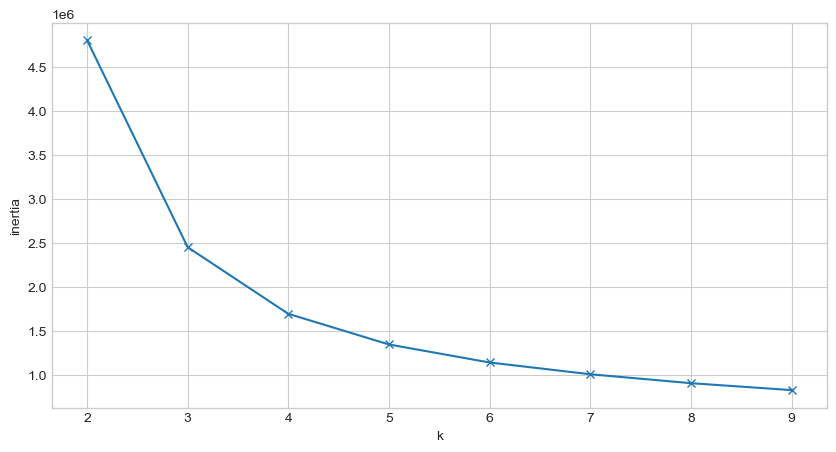

In [41]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(train).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.show()

In [42]:
X = train[['alcohol', 'citric_acid', 'free_sulfur_dioxide']]
X_val = validate[['alcohol', 'citric_acid', 'free_sulfur_dioxide']]
X_test = test[['alcohol', 'citric_acid', 'free_sulfur_dioxide']]

In [43]:
km = KMeans(n_clusters=3)
km.fit(X)

train['cluster'] = km.predict(X)
validate['cluster'] = km.predict(X_val)
test['cluster'] = km.predict(X_test)

In [44]:
X_train1 = train.drop(columns=['quality_bin', 'quality'])
y_train1 = train.quality_bin

X_validate1 = validate.drop(columns=['quality_bin', 'quality'])
y_validate1 = validate.quality_bin

X_test1 = test.drop(columns=['quality_bin', 'quality'])
y_test1 = test.quality_bin

In [45]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
2671            5.9              0.30         0.30             2.0      0.030   
4444            5.0              0.35         0.25             7.8      0.031   
3604            7.4              0.36         0.23             1.9      0.017   
2623            6.5              0.18         0.41            14.2      0.039   
1549            8.5              0.15         0.49             1.5      0.031   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
2671                 38.0                 142.0  0.98892  3.41       0.41   
4444                 24.0                 116.0  0.99241  3.39       0.40   
3604                 31.0                  69.0  0.98920  2.93       0.36   
2623                 47.0                 129.0  0.99678  3.28       0.72   
1549                 17.0                 122.0  0.99320  3.03       0.40   

      alcohol  quality  wine_color  quality_bin  cluster  
2671     12.9        7           0            2        2  
4444     11.3        6           0            1        1  
3604     12.5        6           0            1        2  
2623     10.3        7           0            2        0  
1549     10.3        6           0            1        1

In [46]:
validate.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
585             7.4             0.240         0.22           10.70      0.042   
1686            7.4             0.260         0.37            9.40      0.047   
2512            5.6             0.175         0.29            0.80      0.043   
4269            7.1             0.460         0.23           13.70      0.045   
3244            6.7             0.210         0.36            8.55      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
585                  26.0                  81.0  0.99540  2.86       0.36   
1686                 42.0                 147.0  0.99820  3.46       0.72   
2512                 20.0                  67.0  0.99112  3.28       0.48   
4269                 44.0                 192.0  0.99810  3.11       0.53   
3244                 20.0                  86.0  0.99146  3.19       0.22   

      alcohol  quality  wine_color quality_bin  cluster  
585       9.7        6           0         mid        2  
1686     10.0        5           0         low        2  
2512      9.9        6           0         mid        1  
4269      9.4        5           0         low        2  
3244     13.4        7           0        high        1

In [48]:
baseline_accuracy = (train['quality_bin'].value_counts().idxmax() == train.quality_bin).mean()

baseline_accuracy

0.43662359087159747

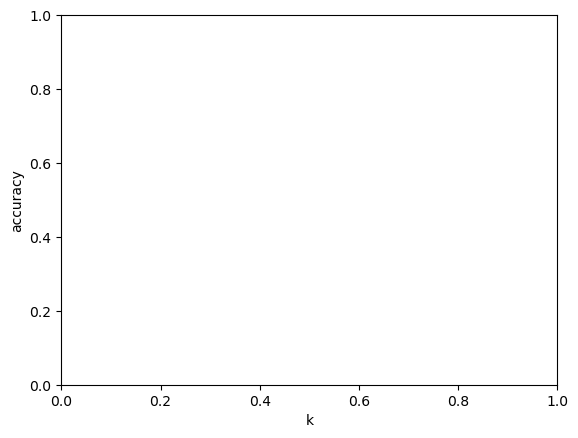

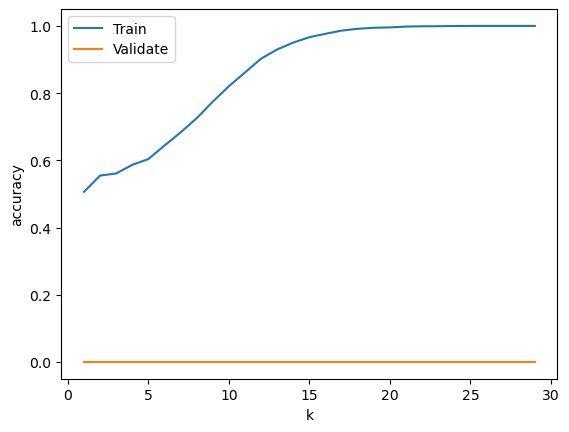

In [62]:
k_range = range(1,30)
train_score = []
validate_score = []
for k in k_range:
    clf = DecisionTreeClassifier(max_depth=k, random_state=117)
    clf.fit(X_train1, y_train1)
    train_score.append(clf.score(X_train1, y_train1))
    validate_score.append(clf.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train')
plt.plot(k_range, validate_score, label = 'Validate')
plt.legend()
plt.show()

In [60]:
clf1 = DecisionTreeClassifier(max_depth=10)

clf1.fit(X_train1, y_train1)

dt_tr_acc = clf1.score(X_train1, y_train1)


clf1.fit(X_validate1, y_validate1)

dt_val_acc = clf1.score(X_validate1, y_validate1)

In [61]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
82.073137%

Validation Accuracy:
86.978833%

Baseline Accuracy:
43.662359%


In [58]:
clf1 = DecisionTreeClassifier(max_depth=7)

clf1.fit(X_train1, y_train1)

dt_tr_acc = clf1.score(X_train1, y_train1)


clf1.fit(X_validate1, y_validate1)

dt_val_acc = clf1.score(X_validate1, y_validate1)

In [59]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
68.298048%

Validation Accuracy:
73.123797%

Baseline Accuracy:
43.662359%


In [50]:
clf1 = DecisionTreeClassifier(max_depth=5)

clf1.fit(X_train1, y_train1)

dt_tr_acc = clf1.score(X_train1, y_train1)


clf1.fit(X_validate1, y_validate1)

dt_val_acc = clf1.score(X_validate1, y_validate1)

In [51]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
60.379434%

Validation Accuracy:
64.656831%

Baseline Accuracy:
43.662359%


In [54]:
clf1 = DecisionTreeClassifier(max_depth=4)

clf1.fit(X_train1, y_train1)

dt_tr_acc = clf1.score(X_train1, y_train1)


clf1.fit(X_validate1, y_validate1)

dt_val_acc = clf1.score(X_validate1, y_validate1)

In [55]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
58.647237%

Validation Accuracy:
61.513791%

Baseline Accuracy:
43.662359%


In [56]:
clf1 = DecisionTreeClassifier(max_depth=3)

clf1.fit(X_train1, y_train1)

dt_tr_acc = clf1.score(X_train1, y_train1)


clf1.fit(X_validate1, y_validate1)

dt_val_acc = clf1.score(X_validate1, y_validate1)

In [57]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
56.090184%

Validation Accuracy:
57.729314%

Baseline Accuracy:
43.662359%


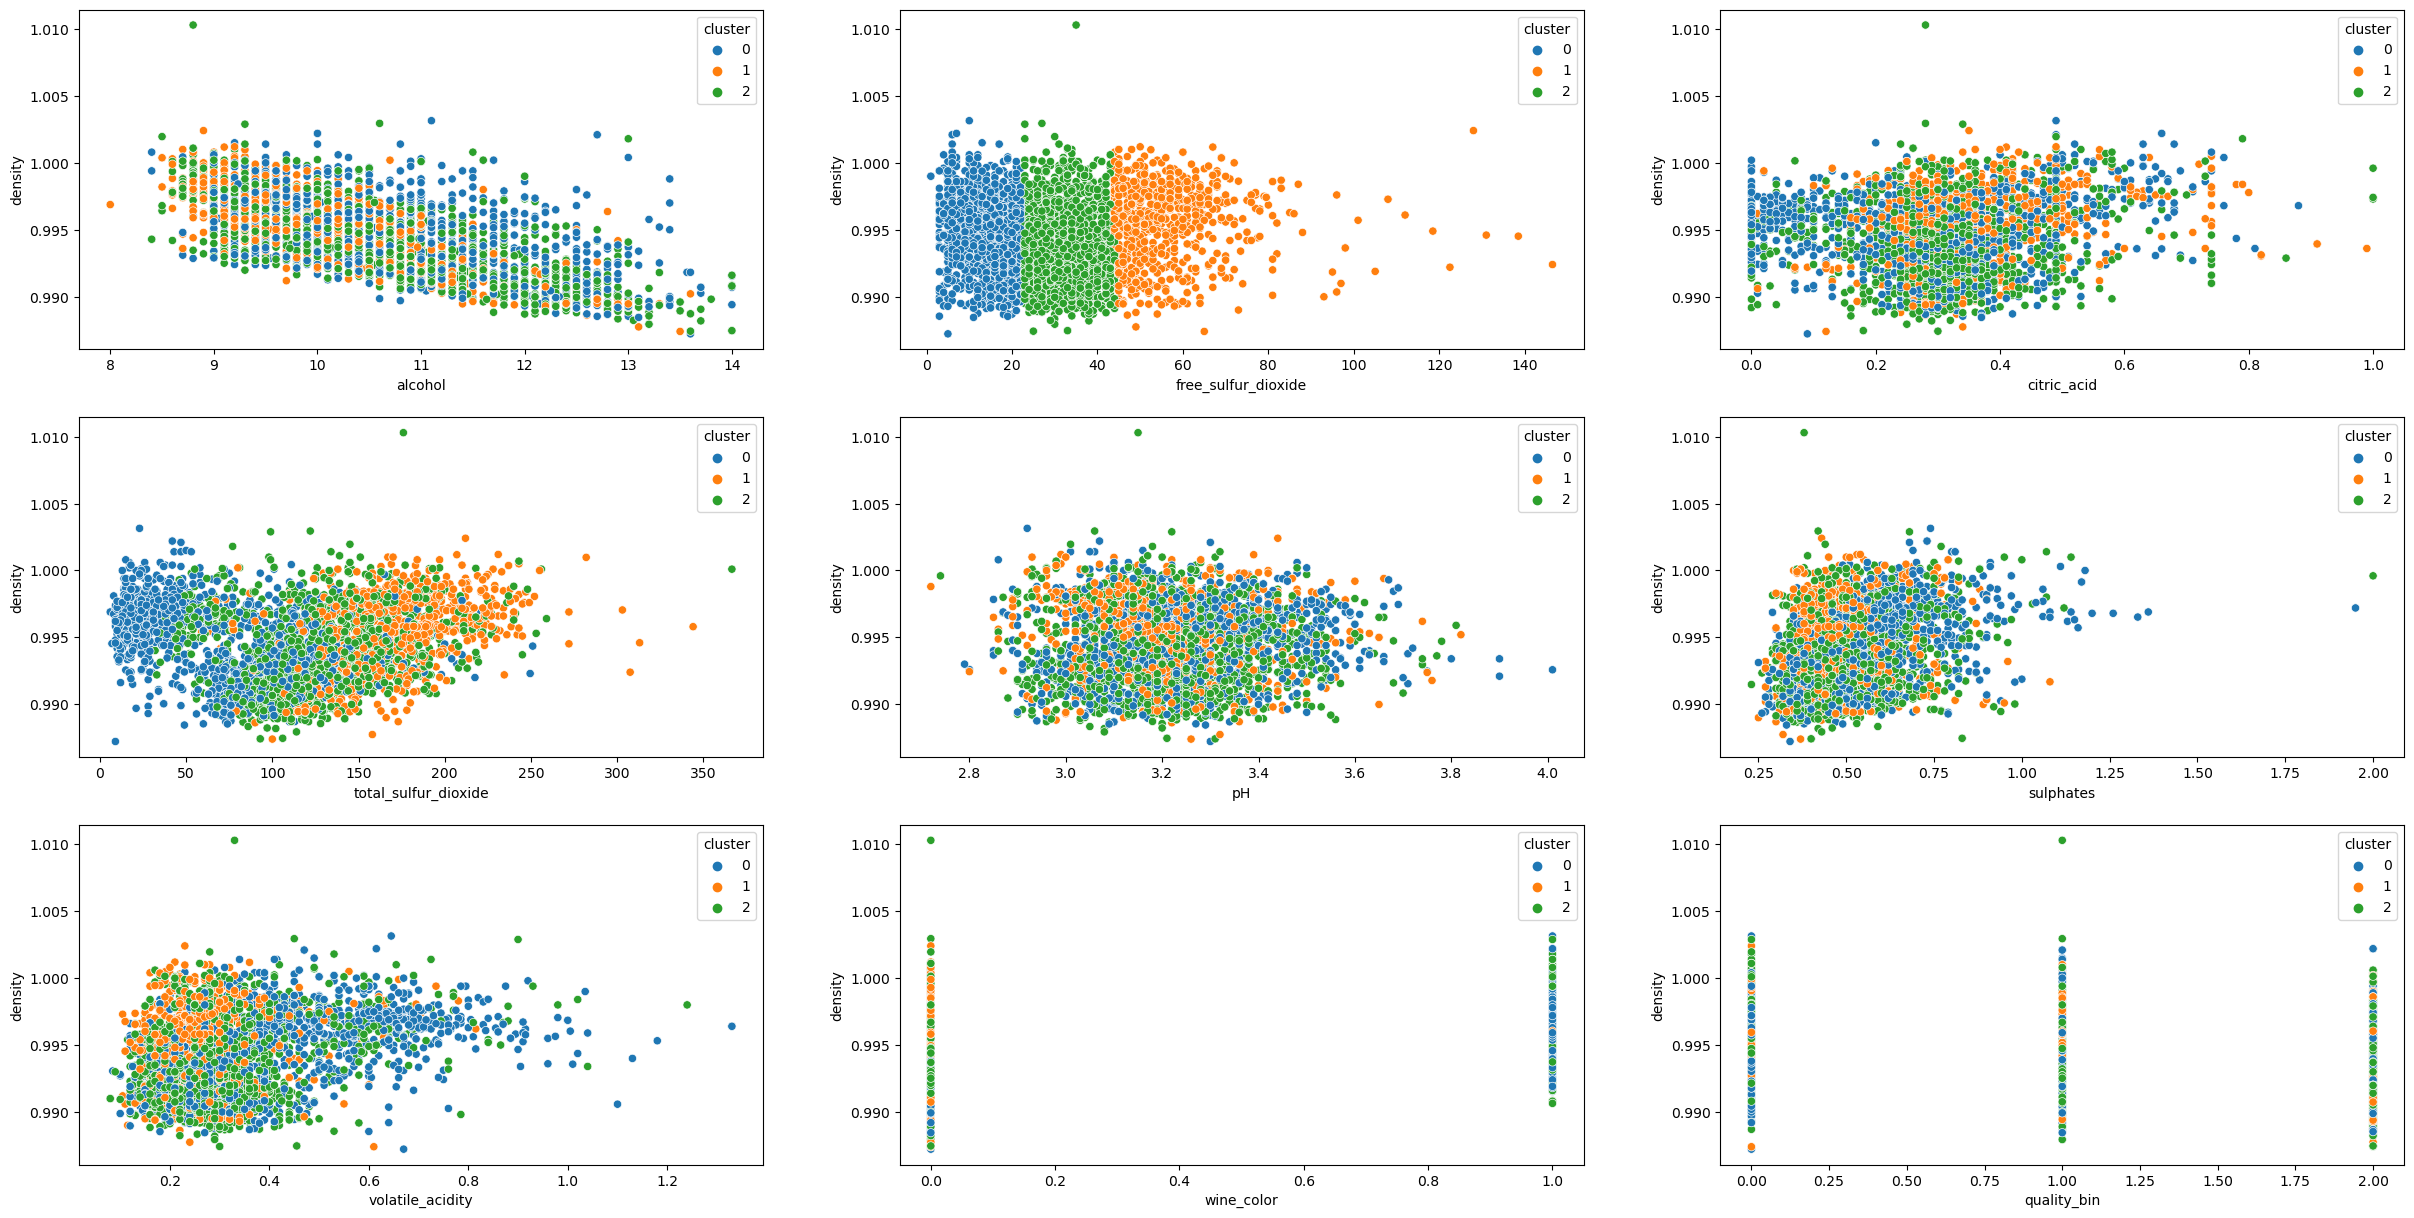

In [83]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.scatterplot(x='alcohol', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,2)
sns.scatterplot(x='free_sulfur_dioxide', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,3)
sns.scatterplot(x='citric_acid', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,4)
sns.scatterplot(x='total_sulfur_dioxide', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,5)
sns.scatterplot(x='pH', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,6)
sns.scatterplot(x='sulphates', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,7)
sns.scatterplot(x='volatile_acidity', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,8)
sns.scatterplot(x='wine_color', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,9)
sns.scatterplot(x='quality_bin', y='density', hue='cluster', data=train, palette='tab10')

plt.show()

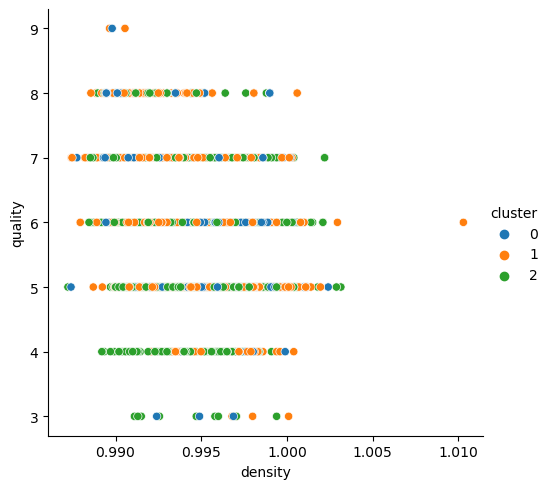

In [62]:
sns.relplot(x='density', y='quality', hue='cluster', data=train, palette='tab10')
plt.show()

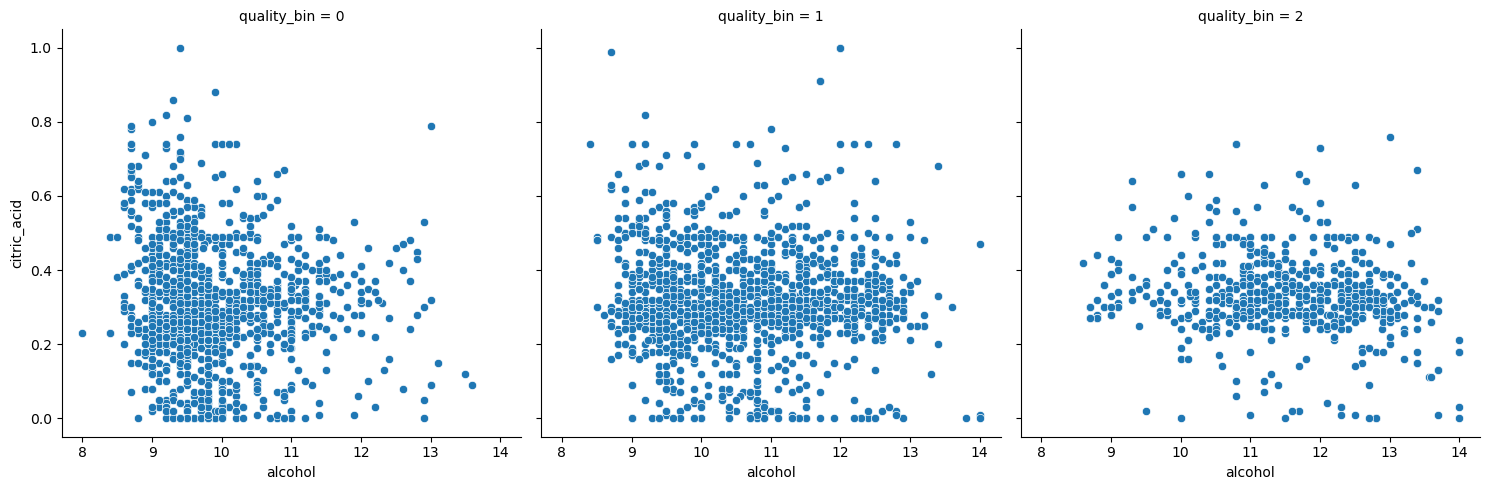

In [89]:
sns.relplot(x='alcohol', y='citric_acid', col='quality_bin', data=train, palette='tab10')
plt.show()

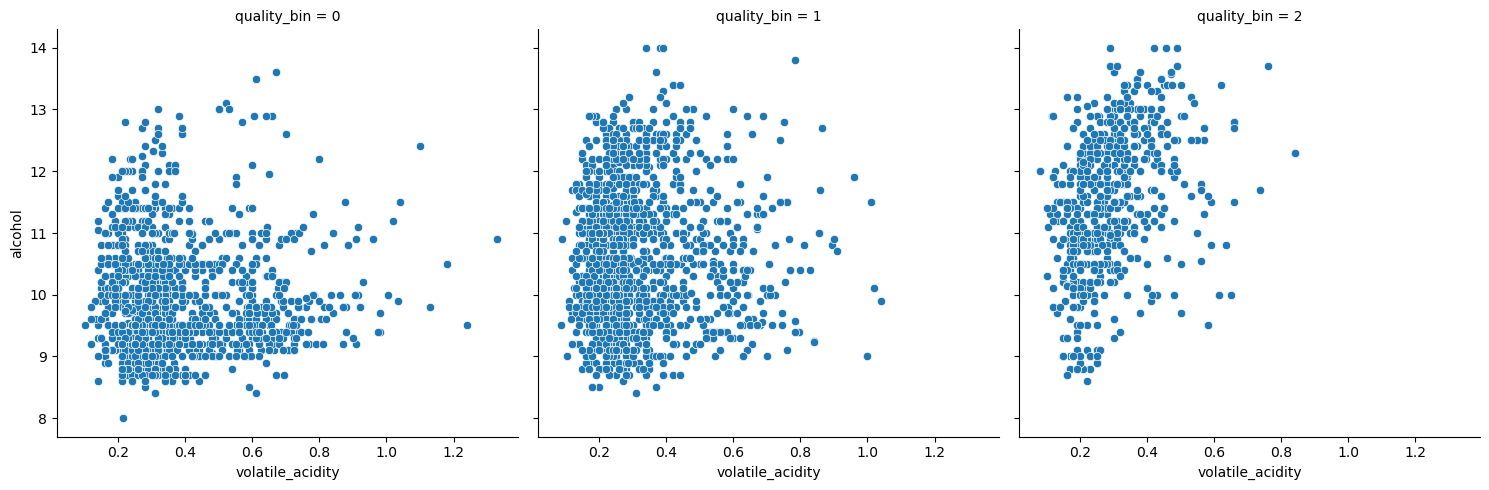

In [93]:
sns.relplot(x='volatile_acidity', y='alcohol', col='quality_bin', data=train, palette='tab10')
plt.show()

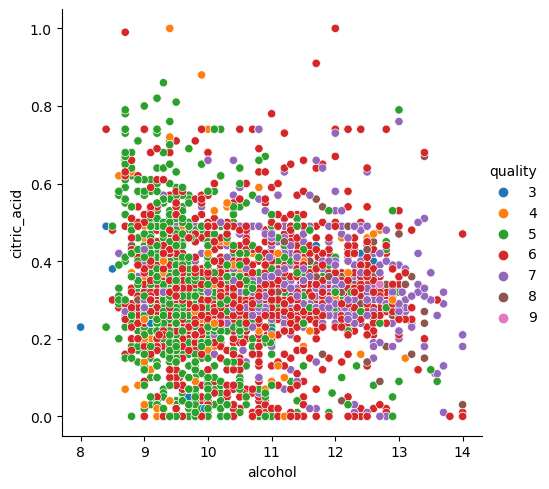

In [69]:
sns.relplot(x='alcohol', y='citric_acid', hue='quality', data=train, palette='tab10')
plt.show()

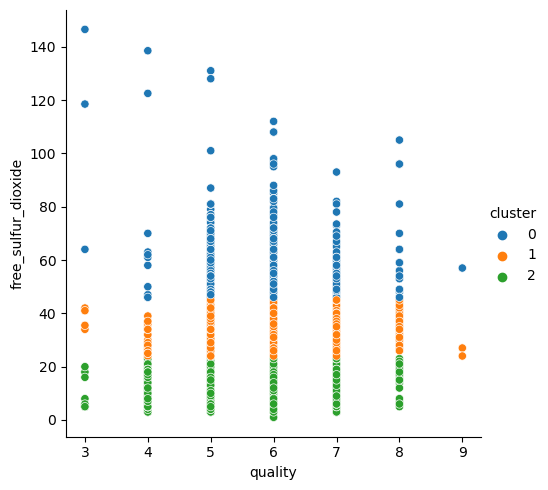

In [64]:
sns.relplot(x='quality', y='free_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.show()

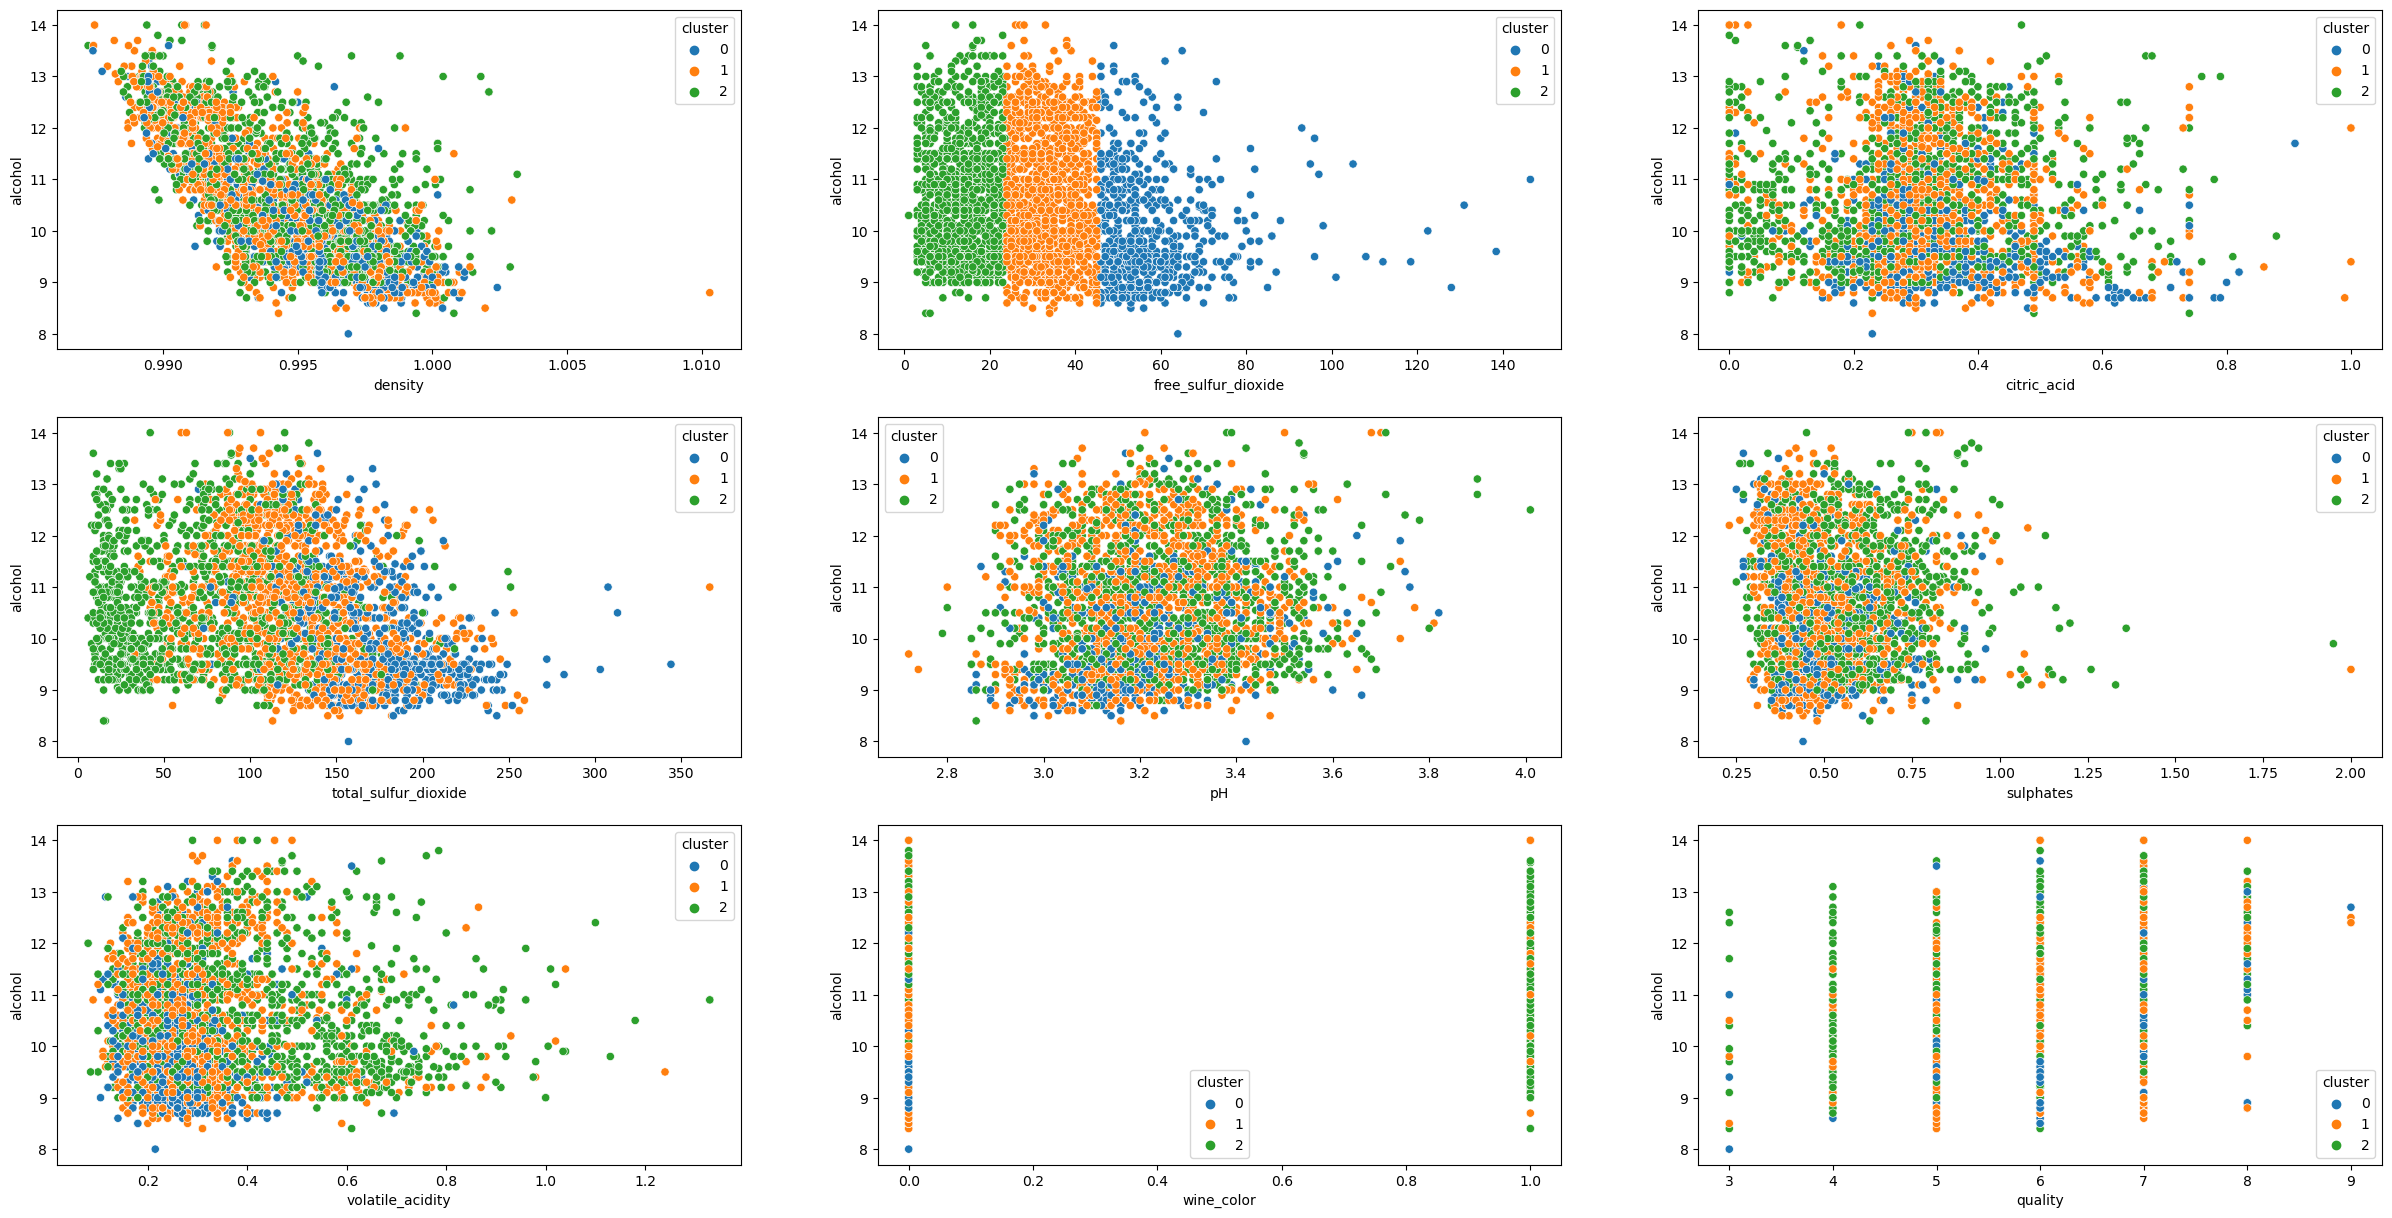

In [70]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.scatterplot(x='density', y='alcohol', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,2)
sns.scatterplot(x='free_sulfur_dioxide', y='alcohol', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,3)
sns.scatterplot(x='citric_acid', y='alcohol', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,4)
sns.scatterplot(x='total_sulfur_dioxide', y='alcohol', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,5)
sns.scatterplot(x='pH', y='alcohol', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,6)
sns.scatterplot(x='sulphates', y='alcohol', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,7)
sns.scatterplot(x='volatile_acidity', y='alcohol', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,8)
sns.scatterplot(x='wine_color', y='alcohol', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,9)
sns.scatterplot(x='quality', y='alcohol', hue='cluster', data=train, palette='tab10')

plt.show()

In [43]:
km = KMeans(n_clusters=4)
km.fit(train)

clusters = km.predict(train)
clusters

array([3, 1, 1, ..., 2, 1, 3], dtype=int32)

In [44]:
train['cluster'] = clusters

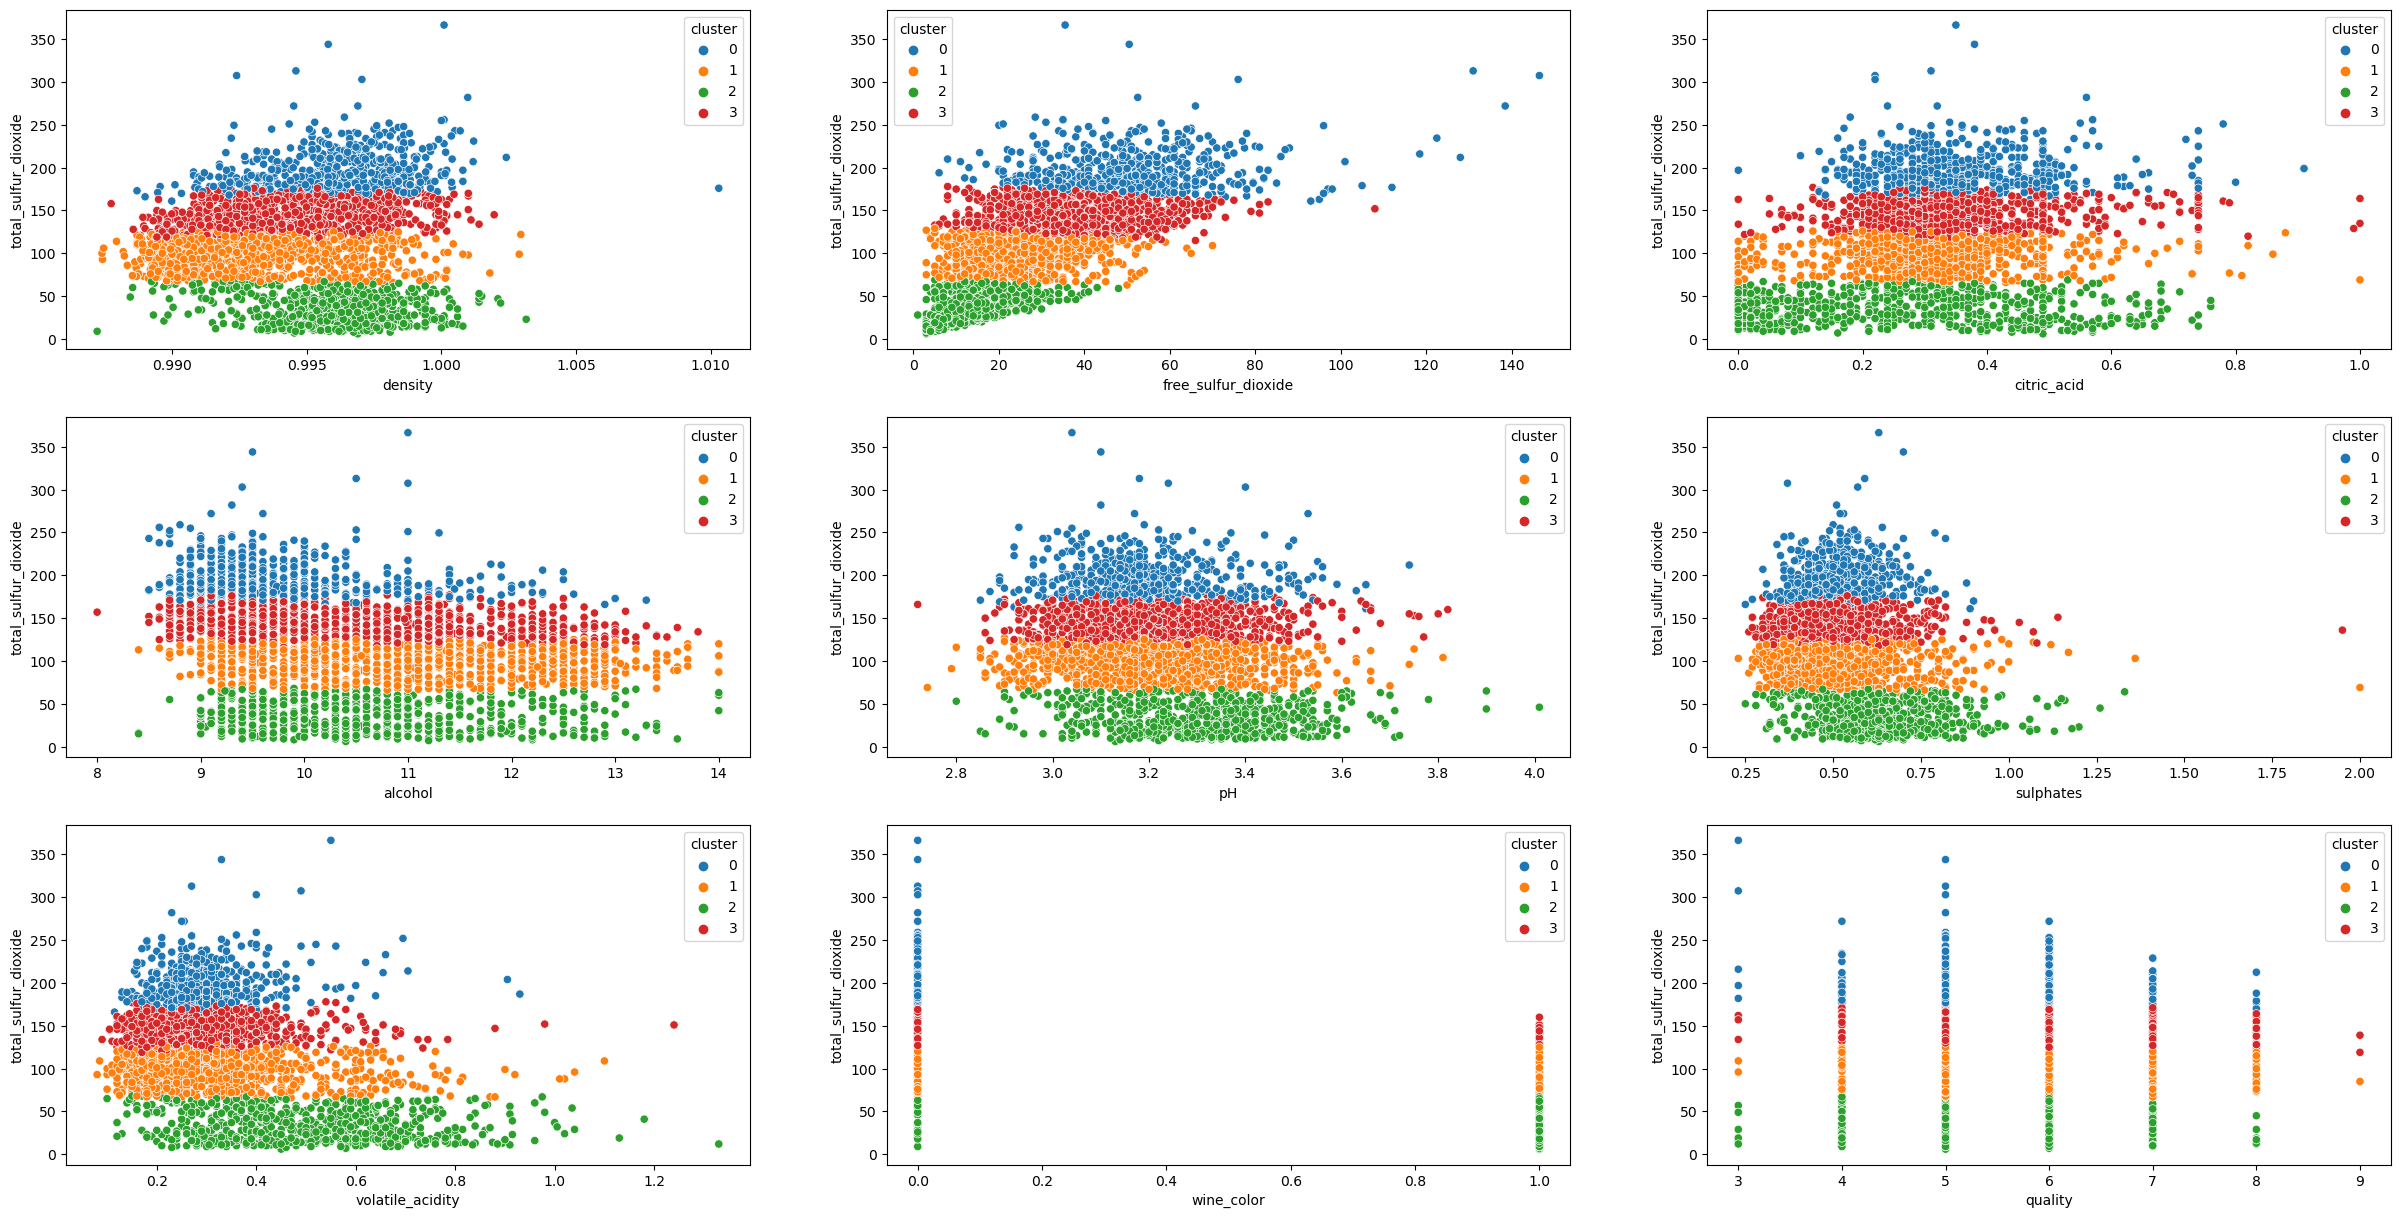

In [45]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.scatterplot(x='density', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,2)
sns.scatterplot(x='free_sulfur_dioxide', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,3)
sns.scatterplot(x='citric_acid', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,4)
sns.scatterplot(x='alcohol', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,5)
sns.scatterplot(x='pH', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,6)
sns.scatterplot(x='sulphates', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,7)
sns.scatterplot(x='volatile_acidity', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,8)
sns.scatterplot(x='wine_color', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,9)
sns.scatterplot(x='quality', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')

plt.show()

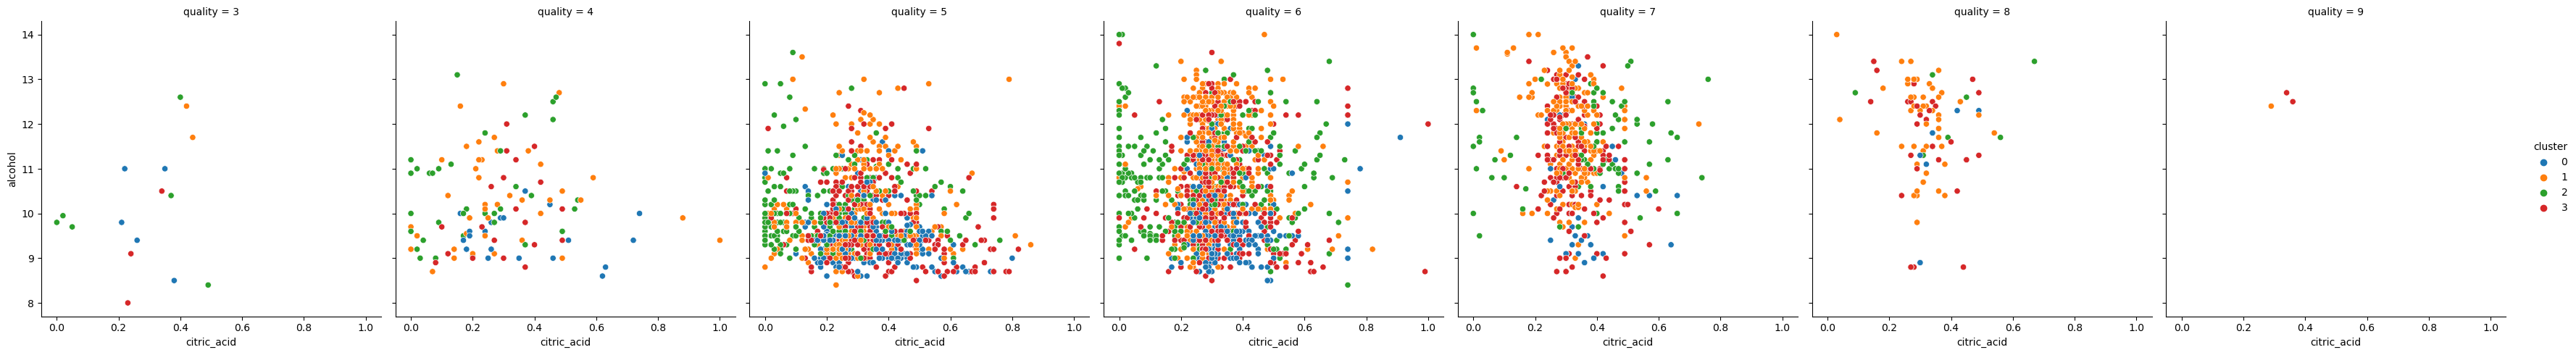

In [46]:
sns.relplot(x='citric_acid', y='alcohol', col='quality', hue='cluster', data=train, palette='tab10')
plt.show()

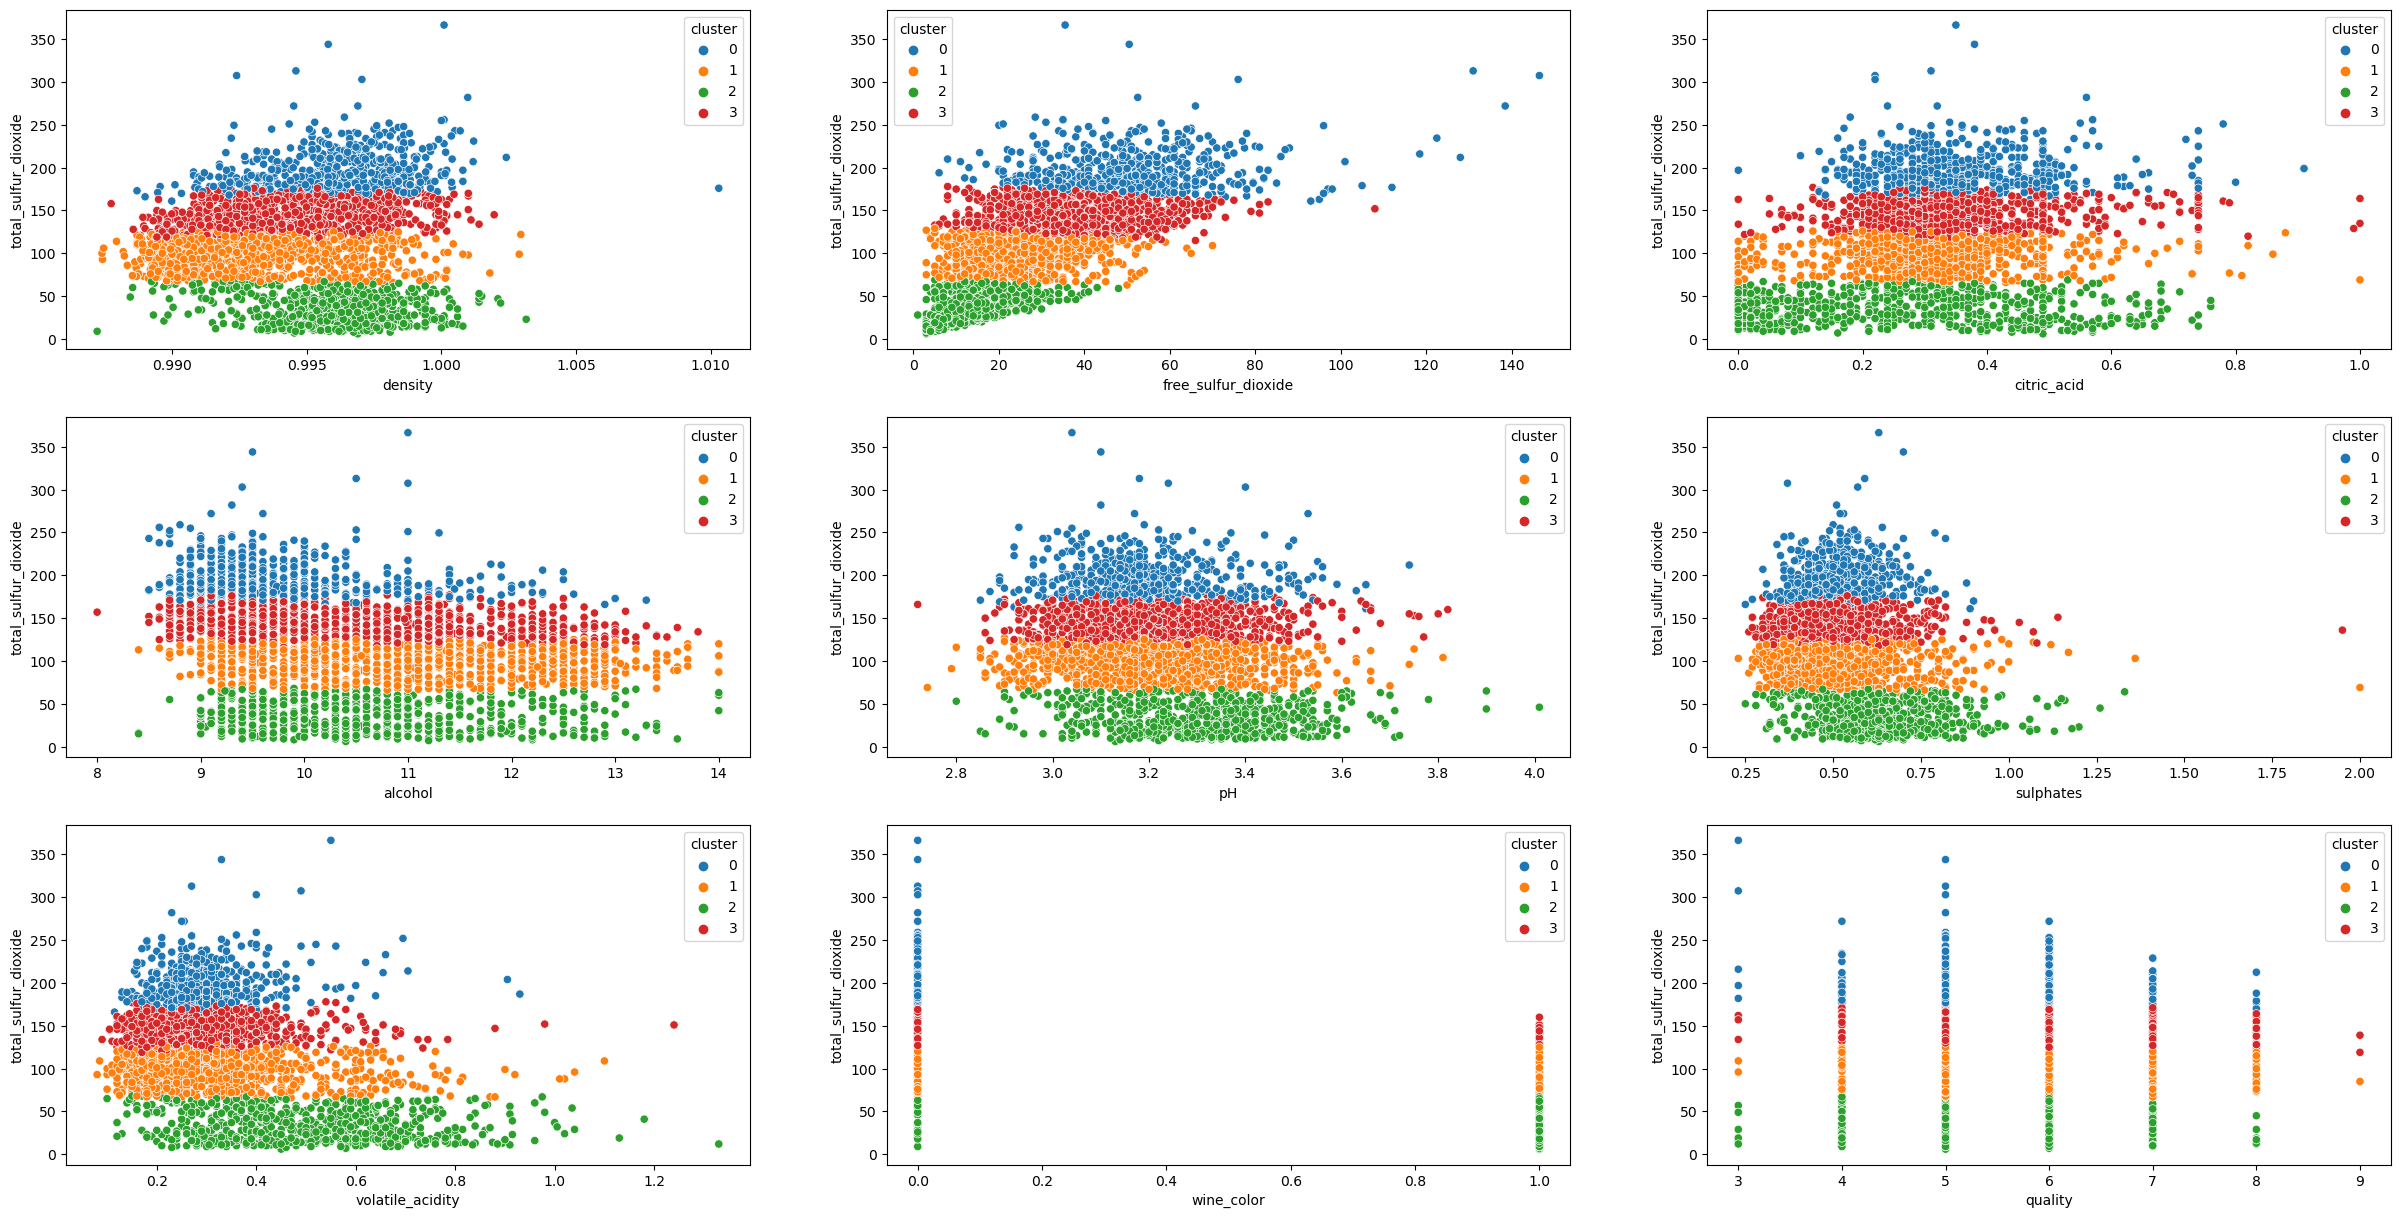

In [48]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.scatterplot(x='density', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,2)
sns.scatterplot(x='free_sulfur_dioxide', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,3)
sns.scatterplot(x='citric_acid', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,4)
sns.scatterplot(x='alcohol', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,5)
sns.scatterplot(x='pH', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,6)
sns.scatterplot(x='sulphates', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,7)
sns.scatterplot(x='volatile_acidity', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,8)
sns.scatterplot(x='wine_color', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,9)
sns.scatterplot(x='quality', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')

plt.show()

In [48]:
km = KMeans(n_clusters=3)
km.fit(train_scaled)

clusters = km.predict(train_scaled)
clusters

array([2, 1, 2, ..., 0, 0, 1], dtype=int32)

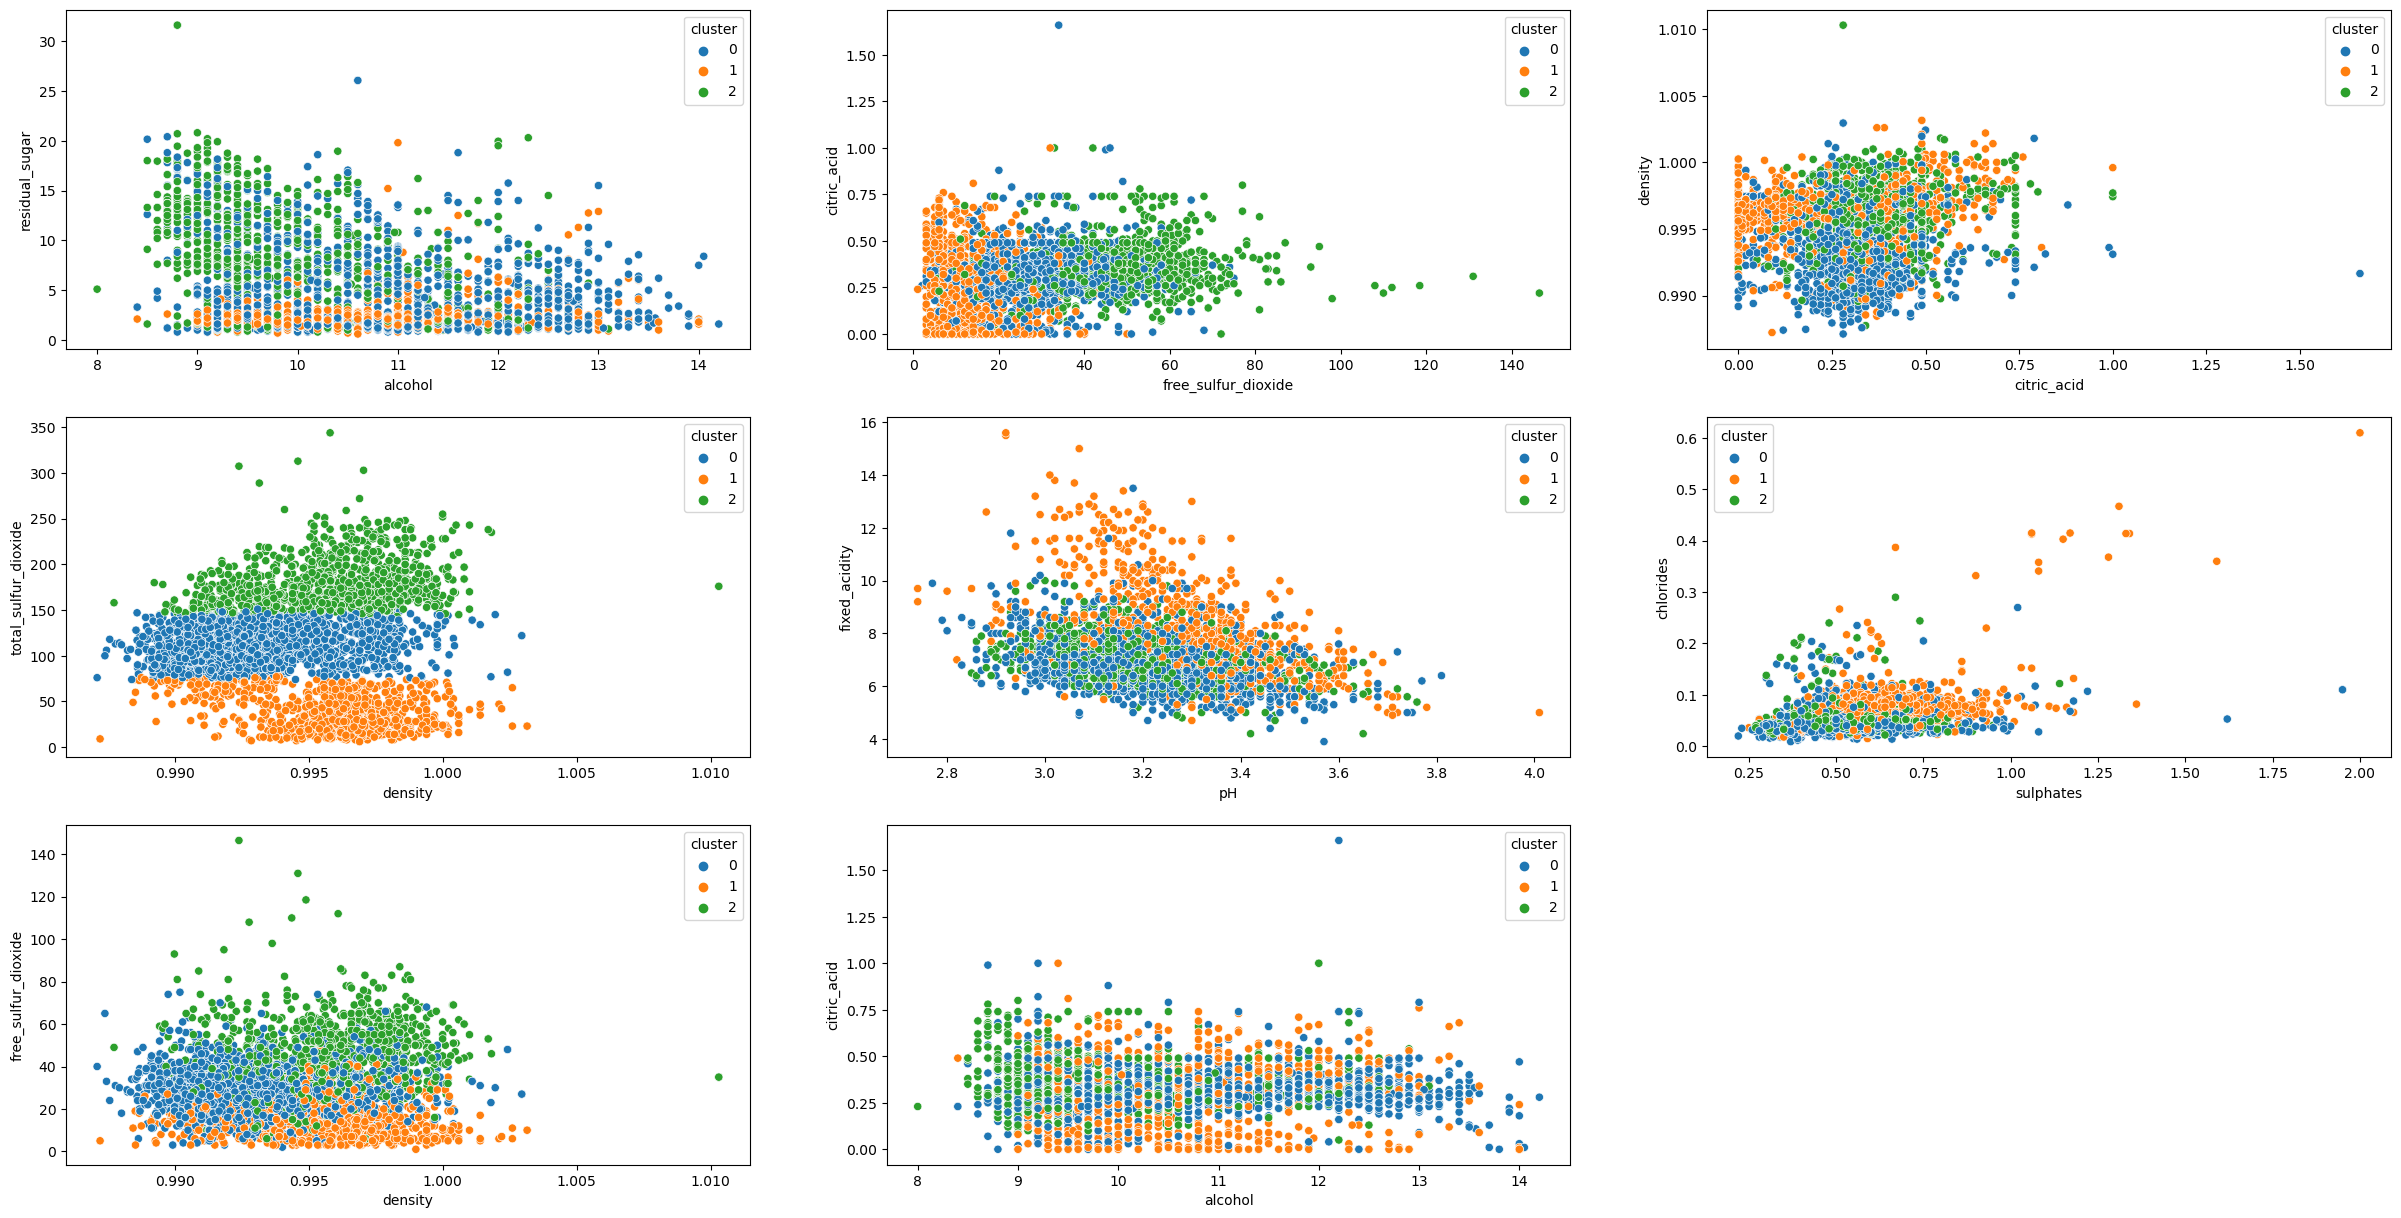

In [91]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.scatterplot(x='alcohol', y='residual_sugar', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,2)
sns.scatterplot(x='free_sulfur_dioxide', y='citric_acid', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,3)
sns.scatterplot(x='citric_acid', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,4)
sns.scatterplot(x='density', y='total_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,5)
sns.scatterplot(x='pH', y='fixed_acidity', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,6)
sns.scatterplot(x='sulphates', y='chlorides', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,7)
sns.scatterplot(x='density', y='free_sulfur_dioxide', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,8)
sns.scatterplot(x='alcohol', y='citric_acid', hue='cluster', data=train, palette='tab10')

plt.show()

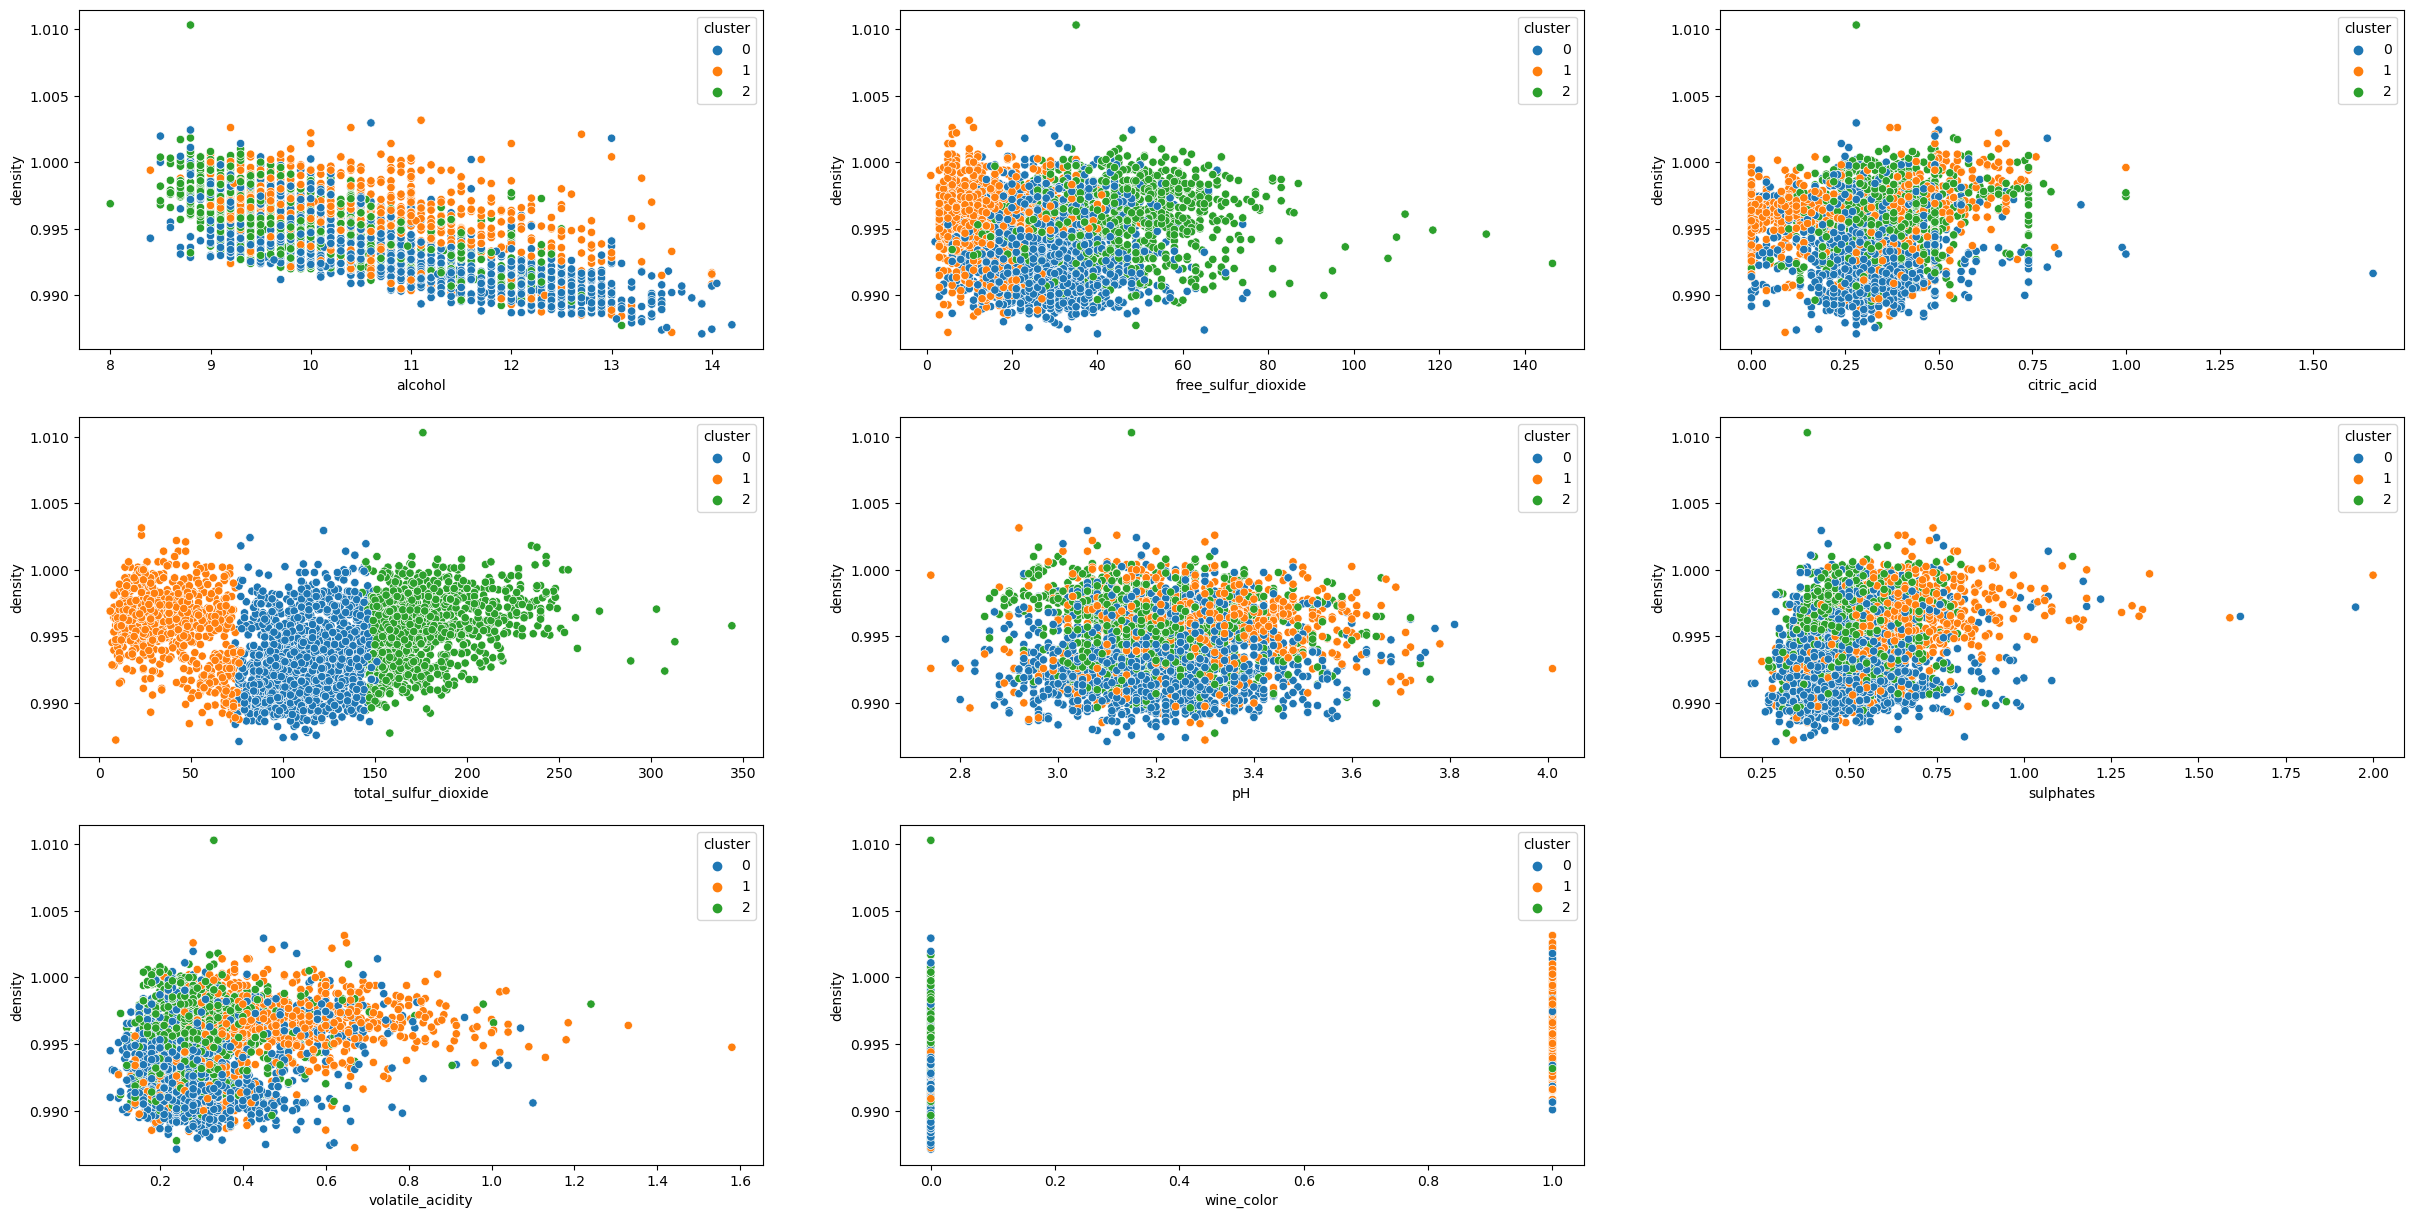

In [92]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.scatterplot(x='alcohol', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,2)
sns.scatterplot(x='free_sulfur_dioxide', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,3)
sns.scatterplot(x='citric_acid', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,4)
sns.scatterplot(x='total_sulfur_dioxide', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,5)
sns.scatterplot(x='pH', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,6)
sns.scatterplot(x='sulphates', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,7)
sns.scatterplot(x='volatile_acidity', y='density', hue='cluster', data=train, palette='tab10')
plt.subplot(3,3,8)
sns.scatterplot(x='wine_color', y='density', hue='cluster', data=train, palette='tab10')

plt.show()

In [35]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_color'],
      dtype='object')

In [26]:
i = 1

In [32]:
plt.figure(figsize=(30, 20))
plt.suptitle('Clustering of Quality by Potential Features')
for col in train_scaled.columns:
    plt.subplot(4,3,i)
    sns.scatterplot(x=col, y='quality', hue='cluster', data=train_scaled, palette='tab10')
    plt.title(f'quality by {col}')
    i+1
    plt.subplots_adjust(hspace = .3, wspace=.2)
plt.show()

ValueError: num must be an integer with 1 <= num <= 12, not 13

In [27]:
km = KMeans(n_clusters=4)
km.fit(train_scaled)
clusters = km.predict(train_scaled)
train_scaled['cluster'] = clusters
i = 1
y = train_scaled['quality']
x = col
plt.figure(figsize=(30, 20))
plt.suptitle('Clustering of Quality by Potential Features')
for col in train_scaled.columns:
    plt.subplot(4,3,i)
    sns.scatterplot(x=col, y=y, hue='cluster', data=train_scaled, palette='tab10')
    plt.title(f'{y} by {col}')
    i+=1
    plt.subplots_adjust(hspace = .3, wspace=.2)
plt.show()

ValueError: num must be an integer with 1 <= num <= 12, not 13